In [2]:
import pandas as pd
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
from utils import setup_plotting_standards, basic_formatting

setup_plotting_standards()
COLOR = '#343434'

# Supplemental Figure 4: Lineage substitution rates
Here, we assess whether any of the third wave lineages have untypical substitution rates.

Our bayesian phylogenetic reconstruction used an uncorrelated relaxed clock rate, which means that every branch samples a different substitution rate from a log-normal distribution. We extracted the median rates of each branch from the MCC tree generated from the run with the script in `lineage-rates/extract-rates.ipynb`.

In [3]:
rates = pd.read_csv( "lineage-rates/lineage_rates.csv" )
rates.head()

,lineage,internal,median_rate,branch_length
0,T9,False,2.967276e-07,3.010490
1,T9,False,8.649867e-07,3.010490
2,T9,True,2.763022e-07,0.556136
3,T9,False,1.712785e-07,2.520708
4,T9,False,2.896827e-07,3.520708


For each lineage, we summarize the distribution of rates observed on its branches.

In [4]:
summary = rates.groupby( ["lineage"] )["median_rate"].describe( percentiles=[0.025, 0.5, 0.975]).reset_index()
summary["lineage_num"] = summary["lineage"].apply( lambda x: int( x[1:] ))
summary = summary.sort_values(["lineage_num"]).reset_index( drop=True )
summary.head()


,lineage,count,mean,std,min,2.5%,50%,97.5%,max,lineage_num
0,T9,371.0,4.269512e-07,4.296140e-07,4.001319e-08,1.209180e-07,2.927878e-07,0.000001,0.000006,9
1,T10,1229.0,4.994939e-07,7.326701e-07,3.825208e-08,1.204386e-07,3.093430e-07,0.000002,0.000019,10
2,T11,131.0,7.775869e-07,1.036112e-06,6.788870e-08,1.296973e-07,4.378641e-07,0.000004,0.000008,11
3,T12,599.0,7.742426e-07,1.280403e-06,6.177741e-08,1.343389e-07,4.052188e-07,0.000004,0.000013,12
4,T13,455.0,8.256197e-07,1.291677e-06,4.067156e-08,8.036367e-08,3.855682e-07,0.000005,0.000011,13


Substitution rates might be elevated on external branches because of the presence of sequencing errors and procedural issues. These types of mutations won't become fixed and therefore the substitution rate on internal branches should be more accurate. Because of this, we also summarize the substitution rates observed for each lineage considering only internal branches.

In [5]:
summary_int = rates.groupby( ["lineage", "internal"] )["median_rate"].describe( percentiles=[0.025, 0.5, 0.975]).reset_index()
summary_int["lineage_num"] = summary_int["lineage"].apply( lambda x: int( x[1:] ))
summary_int = summary_int.sort_values(["lineage_num","internal"])
summary_int = summary_int.loc[summary_int["internal"]].reset_index( drop=True )
summary_int

,lineage,internal,count,mean,std,min,2.5%,50%,97.5%,max,lineage_num
0,T9,True,185.0,4.050971e-07,3.346314e-07,4.001319e-08,1.114156e-07,2.884702e-07,0.000001,0.000003,9
1,T10,True,614.0,4.584895e-07,4.148042e-07,3.825208e-08,1.025774e-07,3.231353e-07,0.000001,0.000004,10
2,T11,True,65.0,9.011578e-07,1.245873e-06,6.788870e-08,1.273751e-07,4.617107e-07,0.000004,0.000008,11
3,T12,True,299.0,5.781187e-07,6.211499e-07,7.766483e-08,1.383550e-07,3.856079e-07,0.000003,0.000005,12
4,T13,True,227.0,6.839490e-07,1.040511e-06,4.067156e-08,6.937806e-08,3.841949e-07,0.000003,0.000009,13
5,T15,True,495.0,4.546649e-07,4.575837e-07,2.651839e-08,6.110639e-08,3.280620e-07,0.000002,0.000005,15


Finally, we plot the distributions of substitution rates for each lineage. This generates Supplemental Figure 4.

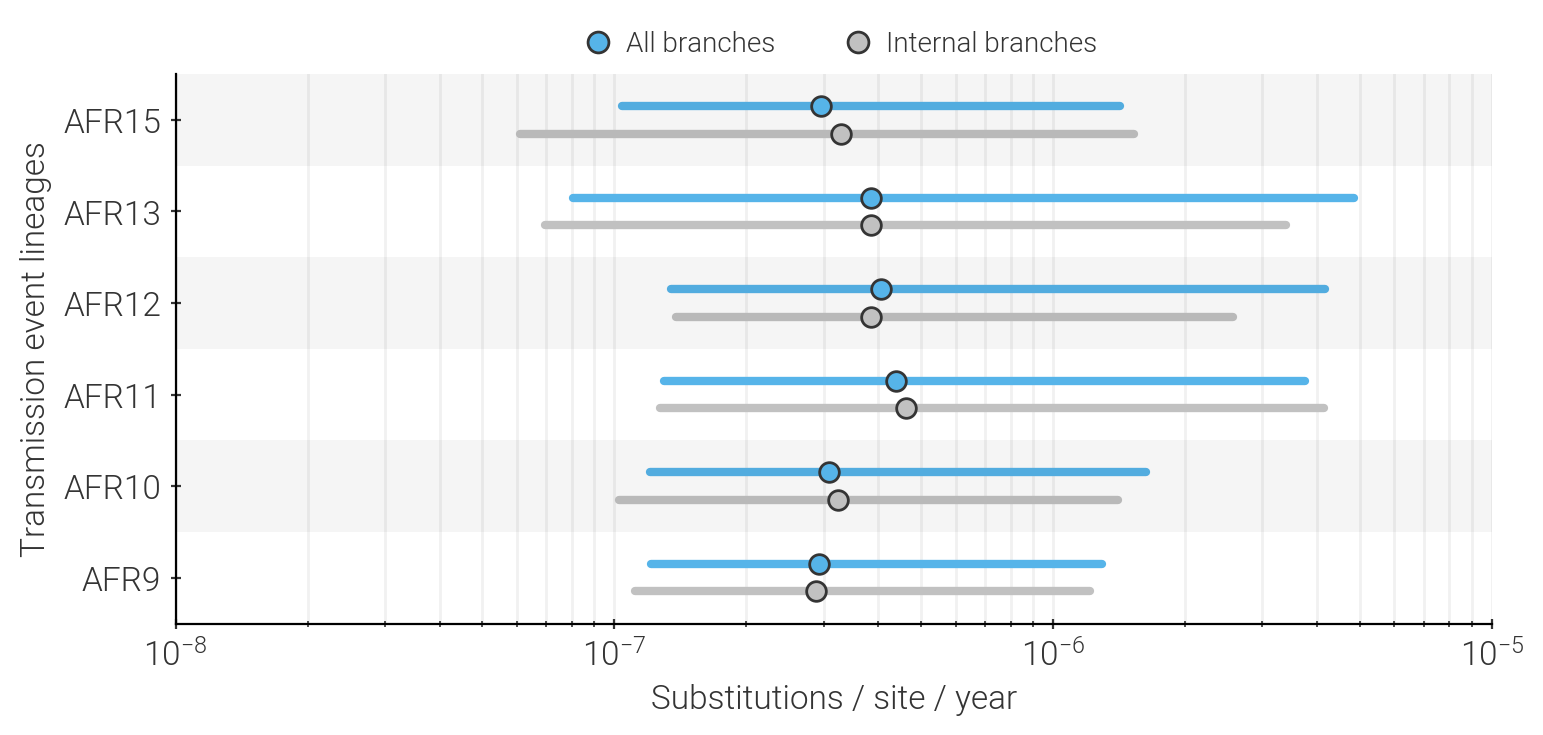

In [6]:
offset = 0.15

fig, ax = plt.subplots( figsize=(8,4) )

ln = ax.hlines( y=summary.index + offset, xmin=summary["2.5%"], xmax=summary["97.5%"], linewidth=3, color="#56B4E9", zorder=5 )
ln.set_capstyle( "round" )
ax.scatter( summary["50%"], summary.index + offset, color="#56B4E9", edgecolor=COLOR, s=50, zorder=10 )

ln = ax.hlines( y=summary_int.index - offset, xmin=summary_int["2.5%"], xmax=summary_int["97.5%"], linewidth=3, color="#C1C1C1", zorder=5 )
ln.set_capstyle( "round" )
ax.scatter( summary_int["50%"], summary_int.index - offset, color="#C1C1C1", edgecolor=COLOR, s=50, zorder=10 )

for i in range( 1, len( summary["lineage"] ), 2):
    ax.axhspan( i-0.5,i+0.5, color="black", alpha=0.04, edgecolor=None, linewidth=0, zorder=5 )

ax.set_yticks(summary.index)
ax.set_yticklabels( summary["lineage"].str.replace( "T", "AFR" ) )
ax.set_xscale( "log" )

legend = [
    Line2D([0], [0], linestyle='none', marker='o', color="#56B4E9", markeredgecolor=COLOR, markeredgewidth=1, label="All branches", markersize=7.5 ),
    Line2D([0], [0], linestyle='none', marker='o', color="#C1C1C1", markeredgecolor=COLOR, markeredgewidth=1, label="Internal branches", markersize=7.5 )
]
legend = ax.legend( handles=legend, ncols=2, loc="upper center", bbox_to_anchor=(0,0,1,1.125), handletextpad=0.0, frameon=False, fontsize=10, edgecolor="None" )    

basic_formatting( ax, which="x", ylims=(-0.5, 5.5), xlims=(1E-8, 1E-5), xlabel="Substitutions / site / year", ylabel="Transmission event lineages" )

plt.tight_layout()
plt.savefig( "plots/figureS3-lineage-substitution-rates.pdf" )
plt.savefig( "plots/figureS3-lineage-substitution-rates.png" )
plt.show()